In [7]:
import pandas as pd
import numpy as np

In [31]:
dataset = pd.read_csv('D:/BDA_Sem_2/MLBD/MLBD Lab/Datasets/archive/API_8_DS2_en_csv_v2_3654.csv', skiprows=4)
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataset.count()

Country Name      67564
Country Code      67564
Indicator Name    67564
Indicator Code    67564
1960              20797
                  ...  
2019              44202
2020              38151
2021              35655
2022              30913
2023              18219
Length: 68, dtype: int64

In [17]:
Countries = dataset['Country Code'].unique()
print("No of Countries", len(Countries))

No of Countries 266


In [18]:
Indicators = dataset['Indicator Name'].unique()
print("No of Indicators", len(Indicators))

No of Indicators 254


In [19]:
# group by country code and find count different incators the country has
grouped = dataset.groupby('Country Code')['Indicator Name'].nunique()
print(grouped)

Country Code
ABW    254
AFE    254
AFG    254
AFW    254
AGO    254
      ... 
XKX    254
YEM    254
ZAF    254
ZMB    254
ZWE    254
Name: Indicator Name, Length: 266, dtype: int64


In [20]:
import pandas as pd

# Group by Indicator Name and find the country with the max value for each year from 1960 to 2023
max_values = dataset.groupby('Indicator Name').apply(lambda x: x.loc[:, '1960':'2023'].idxmax())

# Create a list to store the results
results_list = []

# Iterate through the max_values to get the country name and value for each year
for indicator, row in max_values.iterrows():
    for year in range(1960, 2024):
        year_str = str(year)
        country_idx = row[year_str]
        if pd.notna(country_idx):
            country_name = dataset.loc[country_idx, 'Country Name']
            value = dataset.loc[country_idx, year_str]
            results_list.append({'Indicator Name': indicator, 'Country Name': country_name, 'Year': year, 'Value': value})

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

results.head()

C:\Users\MSIS\AppData\Local\Temp\ipykernel_24452\1115151288.py:4: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_values = dataset.groupby('Indicator Name').apply(lambda x: x.loc[:, '1960':'2023'].idxmax())
C:\Users\MSIS\AppData\Local\Temp\ipykernel_24452\1115151288.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_values = dataset.groupby('Indicator Name').apply(lambda x: x.loc[:, '1960':'2023'].idxmax())


,Indicator Name,Country Name,Year,Value
0,ARI treatment (% of children under 5 taken to ...,"Iran, Islamic Rep.",2000,93.0
1,ARI treatment (% of children under 5 taken to ...,Uganda,2001,67.0
2,ARI treatment (% of children under 5 taken to ...,Jordan,2002,78.0
3,ARI treatment (% of children under 5 taken to ...,"Egypt, Arab Rep.",2003,70.0
4,ARI treatment (% of children under 5 taken to ...,"Korea, Dem. People's Rep.",2004,93.0


In [21]:
results.count()

Indicator Name    9897
Country Name      9897
Year              9897
Value             9897
dtype: int64

In [22]:
years = results['Year'].unique()
print("No of Years", len(years))

No of Years 64


In [23]:
# Group by Indicator Name and Year, then find the max and min value for each group
grouped_max = results.groupby(['Indicator Name', 'Year'])['Value'].idxmax()

# Get the rows corresponding to the max and min values
max_results = results.loc[grouped_max, ['Indicator Name', 'Country Name', 'Year', 'Value']]

# Print the results
print("Max Values:")
max_results

Max Values:


,Indicator Name,Country Name,Year,Value
0,ARI treatment (% of children under 5 taken to ...,"Iran, Islamic Rep.",2000,93.0
1,ARI treatment (% of children under 5 taken to ...,Uganda,2001,67.0
2,ARI treatment (% of children under 5 taken to ...,Jordan,2002,78.0
3,ARI treatment (% of children under 5 taken to ...,"Egypt, Arab Rep.",2003,70.0
4,ARI treatment (% of children under 5 taken to ...,"Korea, Dem. People's Rep.",2004,93.0
...,...,...,...,...
9892,Young people (ages 15-24) newly infected with HIV,World,2018,460000.0
9893,Young people (ages 15-24) newly infected with HIV,World,2019,430000.0
9894,Young people (ages 15-24) newly infected with HIV,World,2020,400000.0
9895,Young people (ages 15-24) newly infected with HIV,World,2021,380000.0


In [24]:
grouped_min = results.groupby(['Indicator Name', 'Year'])['Value'].idxmin()
min_results = results.loc[grouped_min, ['Indicator Name', 'Country Name', 'Year', 'Value']]
print("\nMin Values:")
min_results


Min Values:


,Indicator Name,Country Name,Year,Value
0,ARI treatment (% of children under 5 taken to ...,"Iran, Islamic Rep.",2000,93.0
1,ARI treatment (% of children under 5 taken to ...,Uganda,2001,67.0
2,ARI treatment (% of children under 5 taken to ...,Jordan,2002,78.0
3,ARI treatment (% of children under 5 taken to ...,"Egypt, Arab Rep.",2003,70.0
4,ARI treatment (% of children under 5 taken to ...,"Korea, Dem. People's Rep.",2004,93.0
...,...,...,...,...
9892,Young people (ages 15-24) newly infected with HIV,World,2018,460000.0
9893,Young people (ages 15-24) newly infected with HIV,World,2019,430000.0
9894,Young people (ages 15-24) newly infected with HIV,World,2020,400000.0
9895,Young people (ages 15-24) newly infected with HIV,World,2021,380000.0


In [25]:
results.count()

Indicator Name    9897
Country Name      9897
Year              9897
Value             9897
dtype: int64

In [51]:
# gorup by country with max value for each year in different Indicator name
max_values = results.groupby('Year')['Value'].idxmax()
results.loc[max_values]

,Indicator Name,Country Name,Year,Value
7522,ARI treatment (% of children under 5 taken to ...,World,1960,3.021529e+09
7523,ARI treatment (% of children under 5 taken to ...,World,1961,3.062769e+09
7524,ARI treatment (% of children under 5 taken to ...,World,1962,3.117373e+09
7525,ARI treatment (% of children under 5 taken to ...,World,1963,3.184063e+09
7526,ARI treatment (% of children under 5 taken to ...,World,1964,3.251253e+09
...,...,...,...,...
7581,ARI treatment (% of children under 5 taken to ...,World,2019,7.776892e+09
7582,ARI treatment (% of children under 5 taken to ...,World,2020,7.856139e+09
7583,ARI treatment (% of children under 5 taken to ...,World,2021,7.921184e+09
7584,ARI treatment (% of children under 5 taken to ...,World,2022,7.989982e+09


In [29]:
# group by countires and find the correlation only between the indicators
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
correlation = dataset.groupby('Country Code')[numeric_cols].corr()
correlation

1960      1961      1962      1963      1964      1965  \
Country Code                                                                    
ABW          1960  1.000000  0.999987  0.999967  0.999916  0.999808  0.999597   
             1961  0.999987  1.000000  0.999993  0.999962  0.999880  0.999733   
             1962  0.999967  0.999993  1.000000  0.999987  0.999930  0.999810   
             1963  0.999916  0.999962  0.999987  1.000000  0.999977  0.999896   
             1964  0.999808  0.999880  0.999930  0.999977  1.000000  0.999971   
...                     ...       ...       ...       ...       ...       ...   
ZWE          2019  0.997923  0.997680  0.997387  0.997016  0.996837  0.996916   
             2020  0.997699  0.997436  0.997124  0.996731  0.996540  0.996627   
             2021  0.997480  0.997204  0.996874  0.996460  0.996260  0.996346   
             2022  0.997288  0.996999  0.996655  0.996224  0.996015  0.996105   
             2023  0.996980  0.996669  0.996296  0.995830  0.995606  0.995695   

                       1966      1967      1968      1969  ...      2014  \
Country Code                                               ...             
ABW          1960  0.999389  0.999174  0.999034  0.998883  ...  0.969045   
             1961  0.999521  0.999319  0.999189  0.999049  ...  0.970058   
             1962  0.999627  0.999446  0.999328  0.999200  ...  0.970897   
             1963  0.999753  0.999602  0.999500  0.999388  ...  0.972048   
             1964  0.999880  0.999768  0.999688  0.999597  ...  0.973551   
...                     ...       ...       ...       ...  ...       ...   
ZWE          2019  0.997008  0.997093  0.997172  0.997249  ...  0.999876   
             2020  0.996720  0.996808  0.996891  0.996971  ...  0.999802   
             2021  0.996447  0.996539  0.996625  0.996708  ...  0.999720   
             2022  0.996208  0.996303  0.996392  0.996478  ...  0.999647   
             2023  0.995801  0.995902  0.995997  0.996088  ...  0.999537   

                       2015      2016      2017      2018      2019      2020  \
Country Code                                                                    
ABW          1960  0.961215  0.968649  0.968455  0.968137  0.967657  0.966910   
             1961  0.969807  0.969655  0.969457  0.969135  0.968652  0.967899   
             1962  0.970645  0.970489  0.970287  0.969962  0.969477  0.968727   
             1963  0.971794  0.971633  0.971426  0.971096  0.970610  0.969864   
             1964  0.973295  0.973128  0.972914  0.972579  0.972090  0.971350   
...                     ...       ...       ...       ...       ...       ...   
ZWE          2019  0.999896  0.999930  0.999965  0.999991  1.000000  0.999991   
             2020  0.999826  0.999872  0.999922  0.999964  0.999991  1.000000   
             2021  0.999749  0.999804  0.999868  0.999925  0.999969  0.999993   
             2022  0.999678  0.999740  0.999814  0.999883  0.999940  0.999976   
             2023  0.999571  0.999642  0.999730  0.999817  0.999891  0.999944   

                       2021      2022      2023  
Country Code                                     
ABW          1960  0.965884  0.964896  0.963033  
             1961  0.966890  0.965901  0.964087  
             1962  0.967723  0.966741  0.964949  
             1963  0.968867  0.967895  0.966133  
             1964  0.970366  0.969406  0.967686  
...                     ...       ...       ...  
ZWE          2019  0.999969  0.999940  0.999891  
             2020  0.999993  0.999976  0.999944  
             2021  1.000000  0.999994  0.999977  
             2022  0.999994  1.000000  0.999994  
             2023  0.999977  0.999994  1.000000  

[17024 rows x 64 columns]

In [37]:
# Filter out non-country/indicator related columns, as the dataset seems to include metadata columns
# Assuming the first few columns include country names, indicator names, and years
columns_of_interest = ['Country Name', 'Indicator Name'] + [str(year) for year in range(1960, 2024)]  # Update year range
dataset_clean = dataset[columns_of_interest]

# Reshape the dataset into a long format
df_long = dataset_clean.melt(id_vars=['Country Name', 'Indicator Name'], var_name='Year', value_name='Value')

# Ensure 'Year' is numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Drop any rows with missing data
df_long = df_long.dropna()

# Now, filter the data for a specific country
country_name = "United States"  # Replace with the country you are interested in
df_country = df_long[df_long['Country Name'] == country_name]

# Pivot the data for this country, with each indicator as a column and year as index
df_pivot = df_country.pivot_table(index='Year', columns='Indicator Name', values='Value')

# Calculate the correlation matrix for all indicators for this country across years
correlation_matrix = df_pivot.corr()

In [36]:
# Display the correlation matrix
correlation_matrix

Indicator Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",...,"Survival to age 65, male (% of cohort)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)","Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),UHC service coverage index,Unmet need for contraception (% of married women ages 15-49),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.000000,0.902695,0.675537,-0.893890,0.828647,0.918728,0.494626,0.941742,-0.970395,-0.814538,...,-0.814656,-0.859629,-0.834642,-0.837104,NaN,0.329882,-0.961615,-0.737168,-0.030236,0.998796
Adults (ages 15-49) newly infected with HIV,0.902695,1.000000,-0.953047,-0.967922,0.985767,0.979881,0.319534,0.952194,-0.993169,-0.498082,...,0.846295,-0.893125,-0.888199,-0.864989,NaN,0.185559,-0.755497,0.374634,0.902086,0.903496
Age dependency ratio (% of working-age population),0.675537,-0.953047,1.000000,-0.473629,0.949394,0.787571,-0.202345,-0.445902,0.540335,0.187595,...,-0.852664,0.540299,0.472144,0.514510,NaN,-0.282921,0.602760,-0.084465,-0.669799,-0.986872
"Age dependency ratio, old (% of working-age population)",-0.893890,-0.967922,-0.473629,1.000000,-0.726286,-0.783447,-0.610293,-0.871043,0.922048,0.693367,...,0.733203,0.824705,0.785264,0.803230,NaN,-0.379423,0.843802,0.555762,-0.431336,-0.976064
"Age dependency ratio, young (% of working-age population)",0.828647,0.985767,0.949394,-0.726286,1.000000,0.880254,0.456453,0.974953,-0.960078,-0.952355,...,-0.914858,-0.939731,-0.954295,-0.931742,NaN,0.432249,-0.968789,-0.758731,-0.068162,0.903048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuberculosis treatment success rate (% of new cases),0.329882,0.185559,-0.282921,-0.379423,0.432249,0.422835,-0.028080,0.415560,-0.308331,-0.653048,...,0.098088,-0.248071,-0.263419,-0.254793,NaN,1.000000,-0.347016,-0.087837,0.284842,0.038764
UHC service coverage index,-0.961615,-0.755497,0.602760,0.843802,-0.968789,-0.935314,-0.814531,-0.936459,0.933824,0.886211,...,-0.078042,0.977637,0.977250,0.979497,NaN,-0.347016,1.000000,1.000000,-0.810429,-0.927311
Unmet need for contraception (% of married women ages 15-49),-0.737168,0.374634,-0.084465,0.555762,-0.758731,-0.747528,-0.568452,-1.000000,1.000000,-1.000000,...,0.799826,0.424220,0.403733,0.403517,NaN,-0.087837,1.000000,1.000000,0.315300,0.144251


In [38]:
# Calculate the average correlation for each indicator with all other indicators
average_correlation = correlation_matrix.abs().mean()

# Find the indicator with the highest average correlation
most_impactful_indicator = average_correlation.idxmax()

# Print the result
print(f"The indicator with the most impact on other indicators is: {most_impactful_indicator}")
print(f"Average correlation of this indicator with others: {average_correlation[most_impactful_indicator]}")

The indicator with the most impact on other indicators is: Specialist surgical workforce (per 100,000 population)
Average correlation of this indicator with others: 1.0000000000000095


In [39]:
# Calculate the average correlation for each indicator with all other indicators
average_correlation = correlation_matrix.abs().mean()

# Sort the indicators by their average correlation in descending order
top_10_impactful_indicators = average_correlation.sort_values(ascending=False).head(10)

# Display the top 10 indicators with the most impact on others
print("Top 10 indicators with the most impact on other indicators:")
print(top_10_impactful_indicators)

Top 10 indicators with the most impact on other indicators:
Indicator Name
Specialist surgical workforce (per 100,000 population)                                                   1.000000
Diabetes prevalence (% of population ages 20 to 79)                                                      1.000000
Cause of death, by injury (% of total)                                                                   0.860335
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    0.849616
International migrant stock (% of population)                                                            0.849322
Prevalence of current tobacco use, females (% of female adults)                                          0.831747
Prevalence of current tobacco use, males (% of male adults)                                              0.831540
Prevalence of current tobacco use (% of adults)                                                          0.831066
International

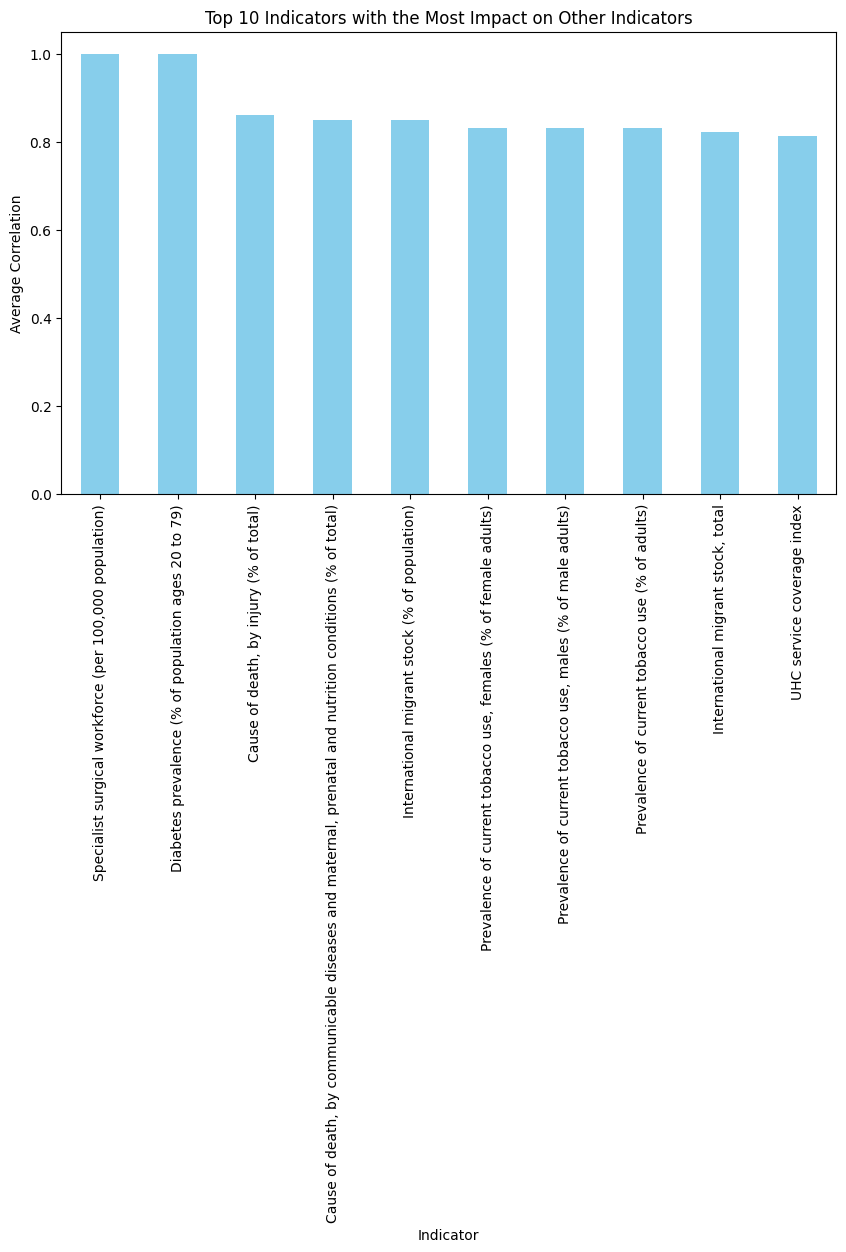

In [41]:
import matplotlib.pyplot as plt

# Plot the top 10 indicators
top_10_impactful_indicators.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Indicators with the Most Impact on Other Indicators')
plt.xlabel('Indicator')
plt.ylabel('Average Correlation')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Now, filter the data for a specific country
country_name = "India"  # Replace with the country you are interested in
df_country = df_long[df_long['Country Name'] == country_name]

# Pivot the data for this country, with each indicator as a column and year as index
df_pivot = df_country.pivot_table(index='Year', columns='Indicator Name', values='Value')

# Calculate the correlation matrix for all indicators for this country across years
correlation_matrix_Ind = df_pivot.corr()

In [45]:
correlation_matrix_Ind

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Antiretroviral therapy coverage (% of people living with HIV),"Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",...,Wanted fertility rate (births per woman),Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Indicator Name,,,,,,,,,,,,,,,,,,,,,
ARI treatment (% of children under 5 taken to a health provider),1.000000,-0.423228,NaN,-0.230732,-0.176054,-0.175387,NaN,-0.216939,0.402856,NaN,...,0.188982,-0.443533,0.398509,0.341137,0.161779,-9.285714e-01,0.383529,-3.711537e-01,-0.388258,0.087959
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.423228,1.000000,NaN,0.982118,-0.886998,0.981085,NaN,0.946701,-0.906650,0.974019,...,0.912750,0.998265,0.599167,0.647443,0.776981,1.377557e-01,0.612117,9.210159e-01,0.925083,-0.929012
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age dependency ratio (% of working-age population),-0.230732,0.982118,NaN,1.000000,-0.910030,0.999534,NaN,0.981199,-0.959154,0.998993,...,0.928344,0.979002,0.787449,0.823994,0.914413,-1.256710e-01,0.797376,9.100455e-01,0.964871,-0.961153
"Age dependency ratio, old (% of working-age population)",-0.176054,-0.886998,NaN,-0.910030,1.000000,-0.922255,NaN,-0.903223,0.912650,-0.915098,...,-0.831412,-0.872491,-0.936281,-0.956177,-0.993789,4.179911e-01,-0.941873,-8.752477e-01,-0.951221,0.849047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Women who believe a husband is justified in beating his wife when she neglects the children (%),-0.928571,0.137756,NaN,-0.125671,0.417991,-0.166394,NaN,-0.161416,0.033346,NaN,...,-0.539949,0.079202,-0.710453,-0.665659,-0.516488,1.000000e+00,-0.698906,8.970088e-16,0.018488,0.215519
Women who believe a husband is justified in beating his wife when she refuses sex with him (%),0.383529,0.612117,NaN,0.797376,-0.941873,0.821537,NaN,0.818649,-0.738122,NaN,...,0.979367,0.657612,0.999868,0.998966,0.973410,-6.989056e-01,1.000000,7.152139e-01,0.702170,-0.849033
Women who were first married by age 15 (% of women ages 20-24),-0.371154,0.921016,NaN,0.910045,-0.875248,0.911314,NaN,0.902877,-0.901125,NaN,...,0.715135,0.996859,0.703745,0.746256,0.856294,8.970088e-16,0.715214,1.000000e+00,0.942778,-0.789321


In [47]:
# Calculate the average correlation for each indicator with all other indicators
average_correlation = correlation_matrix_Ind.abs().mean()

# Sort the indicators by their average correlation in descending order
top_10_impactful_indicators_Ind = average_correlation.sort_values(ascending=False).head(10)

# Display the top 10 indicators with the most impact on others
print("Top 10 indicators with the most impact on other indicators:")
print(top_10_impactful_indicators)

Top 10 indicators with the most impact on other indicators:
Indicator Name
Diabetes prevalence (% of population ages 20 to 79)                                                      1.000000
Use of insecticide-treated bed nets (% of under-5 population)                                            1.000000
Completeness of death registration with cause-of-death information (%)                                   1.000000
Prevalence of current tobacco use, males (% of male adults)                                              0.934707
Prevalence of current tobacco use (% of adults)                                                          0.932399
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    0.930105
Cause of death, by non-communicable diseases (% of total)                                                0.929782
Prevalence of current tobacco use, females (% of female adults)                                          0.929179
Diarrhea trea

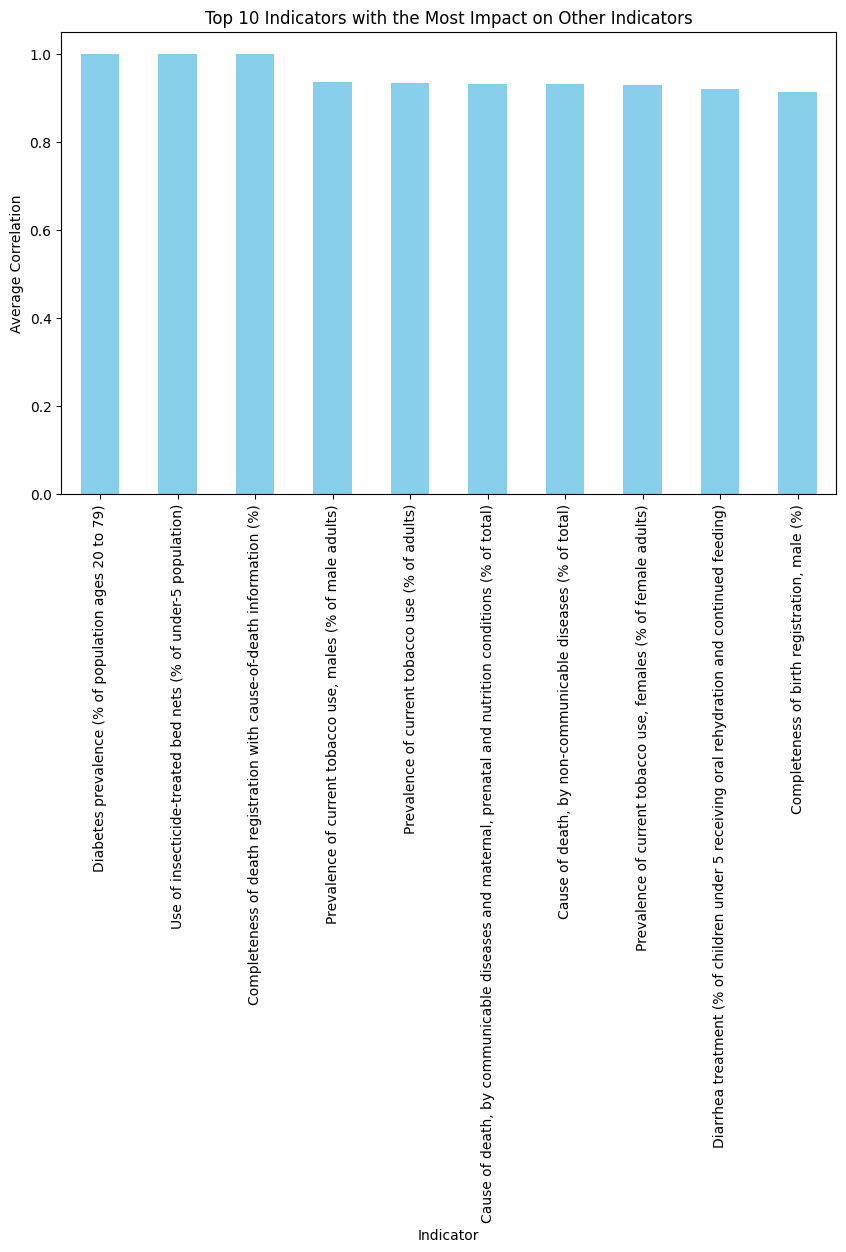

In [48]:
import matplotlib.pyplot as plt

# Plot the top 10 indicators
top_10_impactful_indicators.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Indicators with the Most Impact on Other Indicators')
plt.xlabel('Indicator')
plt.ylabel('Average Correlation')
plt.xticks(rotation=90)
plt.show()